0.9808612440191388
0.7906698564593302
0.9605263157894737
0.9055023923444976
[[732   0]
 [ 16  88]]


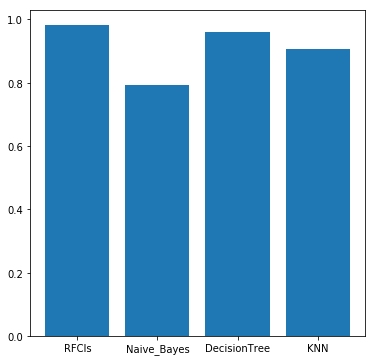

In [2]:
import re 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import matplotlib.pyplot as plt
ps= PorterStemmer()
#nltk.download('punkt')
from nltk.tokenize import word_tokenize as wt
dt = pd.read_csv('spam.csv',encoding='latin-1')
stop_words= stopwords.words('english')
X= dt['v2']
#print(X)
listN=[]
for each in X:
    #print(each)
    rep = (re.sub('[^a-zA-Z]',' ',each)).split()
    rep1 = [ps.stem(elem) for elem in rep if elem not in set(stop_words) if len(elem) > 3 ]
    listN.append(rep1)
strN = [' '.join(each) for each in listN]
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=6000)
X= cv.fit_transform(strN).toarray()
Y= dt['v1'].values
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score as ac,confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=15,metric= 'minkowski',p=2)
dsc =DecisionTreeClassifier(criterion='entropy',random_state=1,max_leaf_nodes=36)
gb= GaussianNB()
rC= RandomForestClassifier(n_estimators=100,criterion='entropy', random_state=1,max_leaf_nodes=123)
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.15,random_state=1)
rC.fit(X_train,y_train)
gb.fit(X_train,y_train)
dsc.fit(X_train,y_train)
knn.fit(X_train,y_train)
print(ac(y_test,rC.predict(X_test)))
print(ac(y_test,gb.predict(X_test)))
print(ac(y_test,dsc.predict(X_test)))
print(ac(y_test,knn.predict(X_test)))
pred=ac(y_test,rC.predict(X_test))
pred1=ac(y_test,gb.predict(X_test))
pred2=ac(y_test,dsc.predict(X_test))
pred3=ac(y_test,knn.predict(X_test))
cm = confusion_matrix(y_test,rC.predict(X_test))
print(cm)
plt.figure(figsize=(6,6))
plt.bar(np.arange(4),(pred,pred1,pred2,pred3),width=0.8)
plt.xticks(np.arange(4),('RFCls','Naive_Bayes','DecisionTree','KNN'))
plt.show()